In [58]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [49]:
# -- load comma separate version of file into numpy array of dimensions (100, 504)
d = pd.read_csv("./data/test.txt", delimiter=",", header=None, skiprows=1).values

In [50]:
# -- split d into 3 segments vertically, to separate the three calo layers
first, second, third = np.split(d, indices_or_sections=[3*96, 3*96 + 12*12], axis=1)

In [51]:
# -- reshape to put them into unravelled, 2D image format
first = first.reshape(-1, 3, 96)
second = second.reshape(-1, 12, 12)
third = third.reshape(-1, 12, 6)

# Check that one event makes sense

The 0th event is empty

In [52]:
imageix = 1

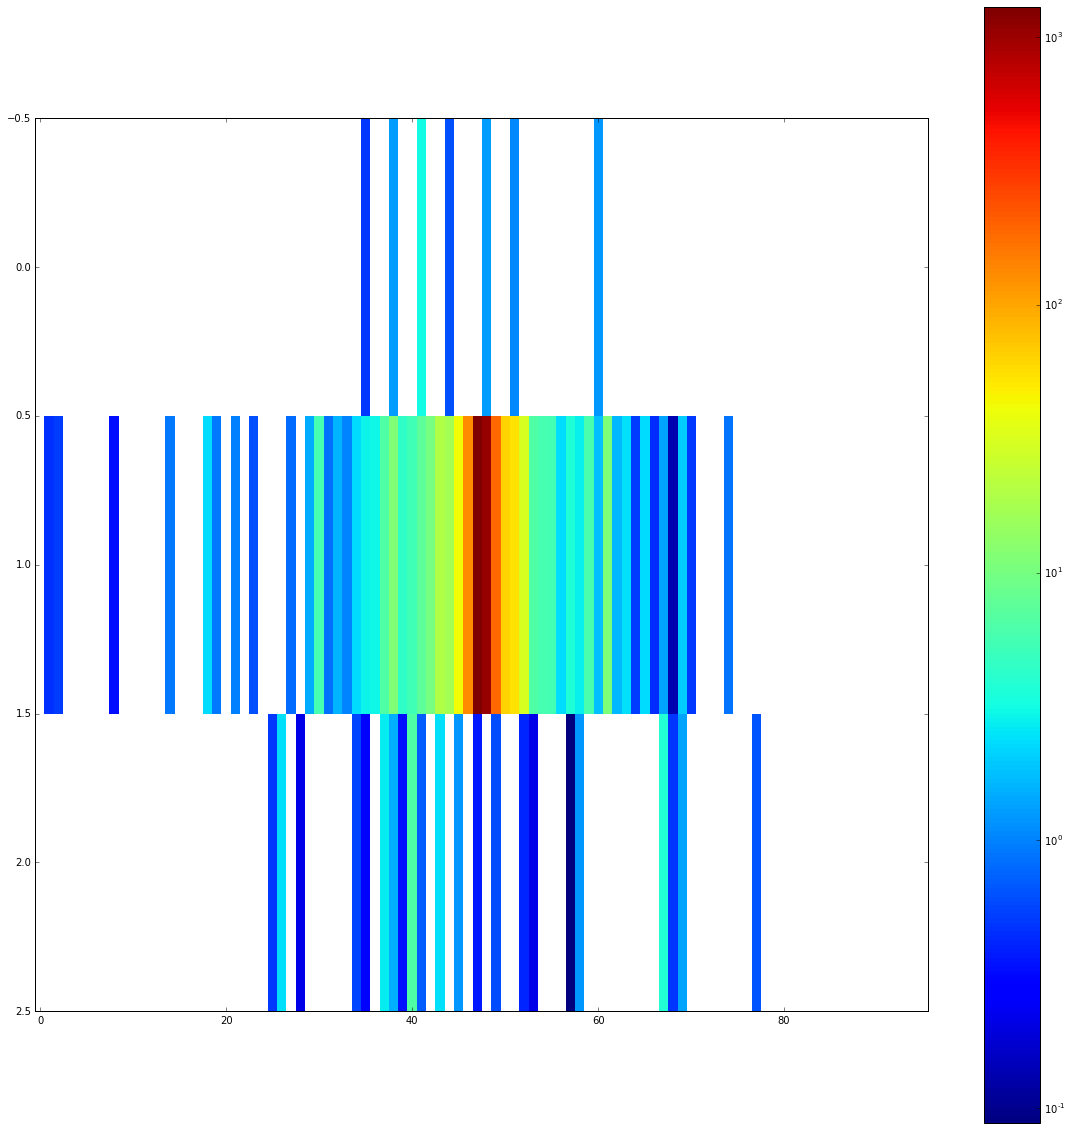

In [64]:
plt.figure(figsize=(20,20))
plt.imshow(first[imageix], aspect=960/30, interpolation='nearest', norm=LogNorm())
plt.colorbar()
# aspect is needed to make this 3*96 image come out nice

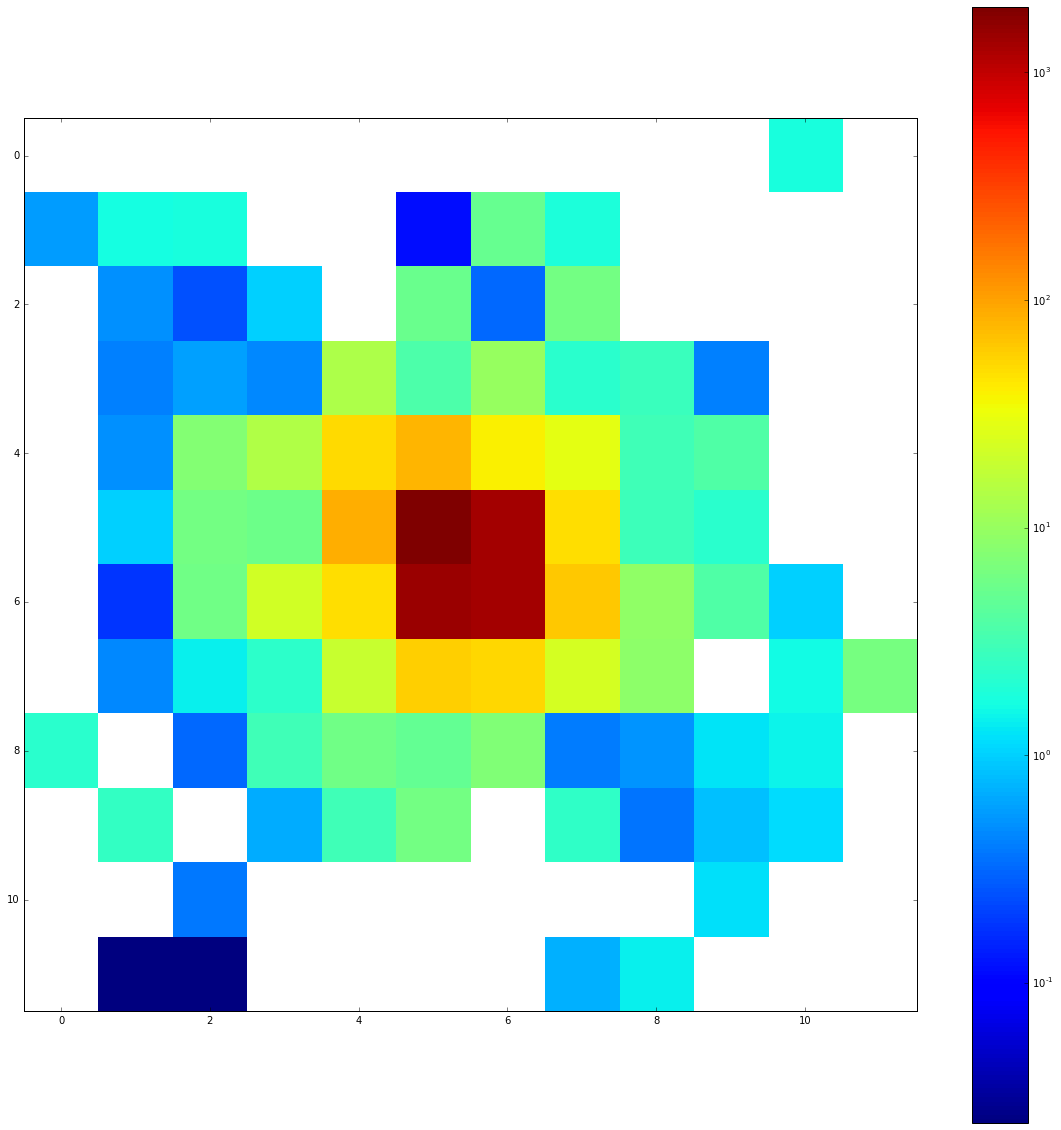

In [65]:
plt.figure(figsize=(20,20))
plt.imshow(second[imageix], interpolation='nearest', norm=LogNorm())
plt.colorbar()

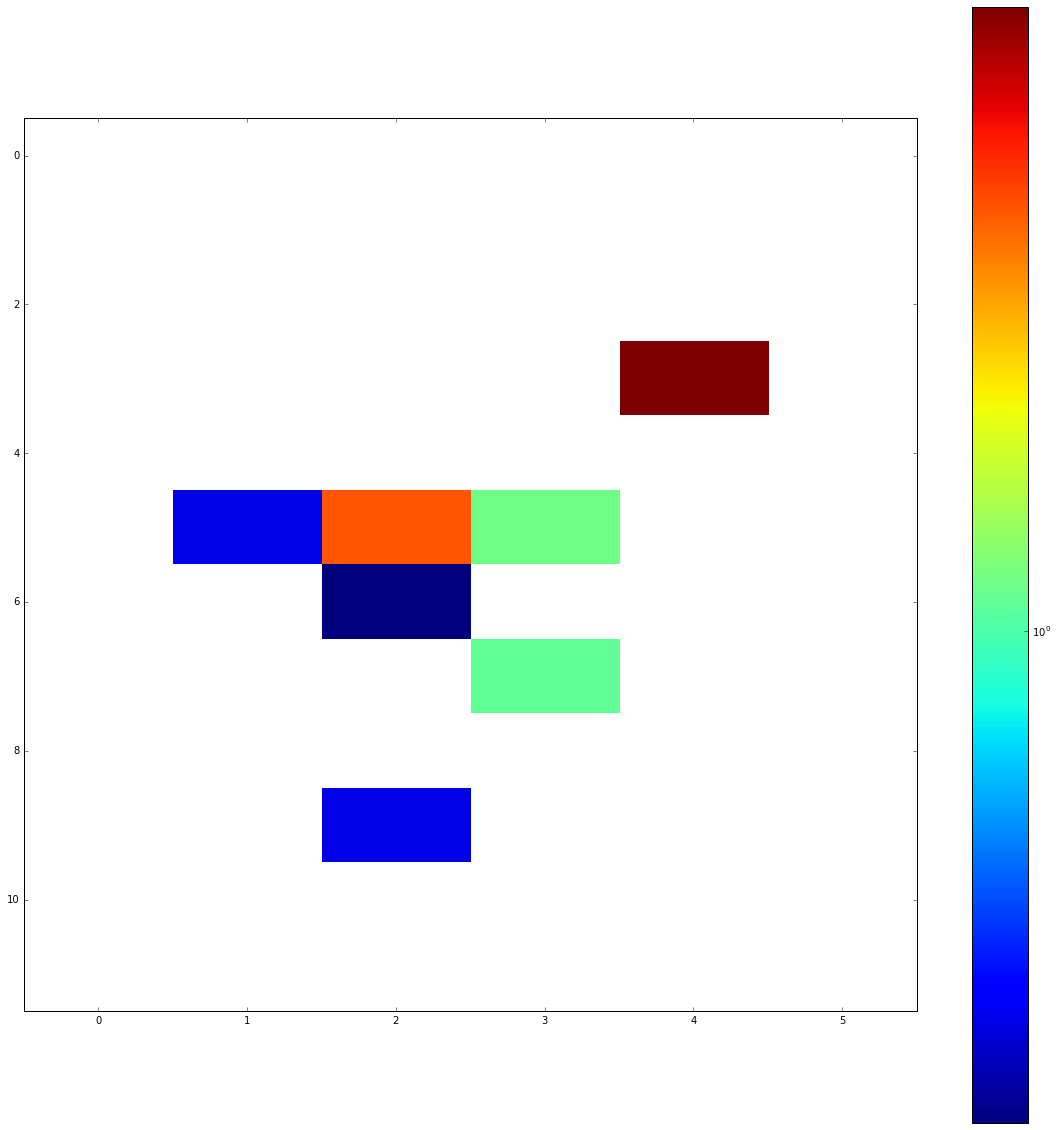

In [66]:
plt.figure(figsize=(20,20))
plt.imshow(third[imageix], aspect=6/12., interpolation='nearest', norm=LogNorm())
plt.colorbar()
# is this rotated?? is it 12*6 or 6*12?

# Mean Images

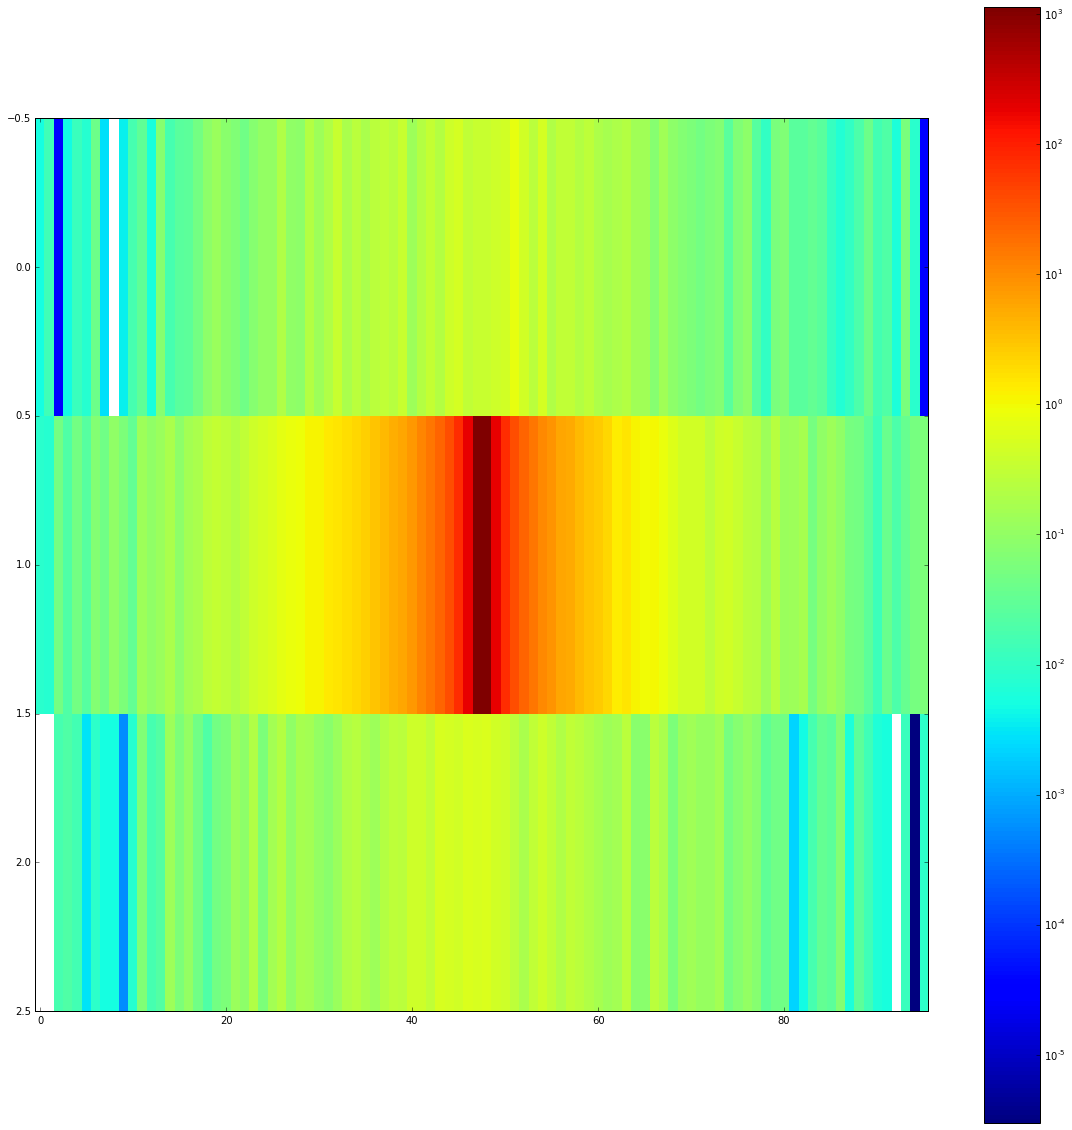

In [71]:
plt.figure(figsize=(20,20))
plt.imshow(first.mean(axis=0), aspect=96./3, interpolation='nearest', norm=LogNorm())
plt.colorbar()

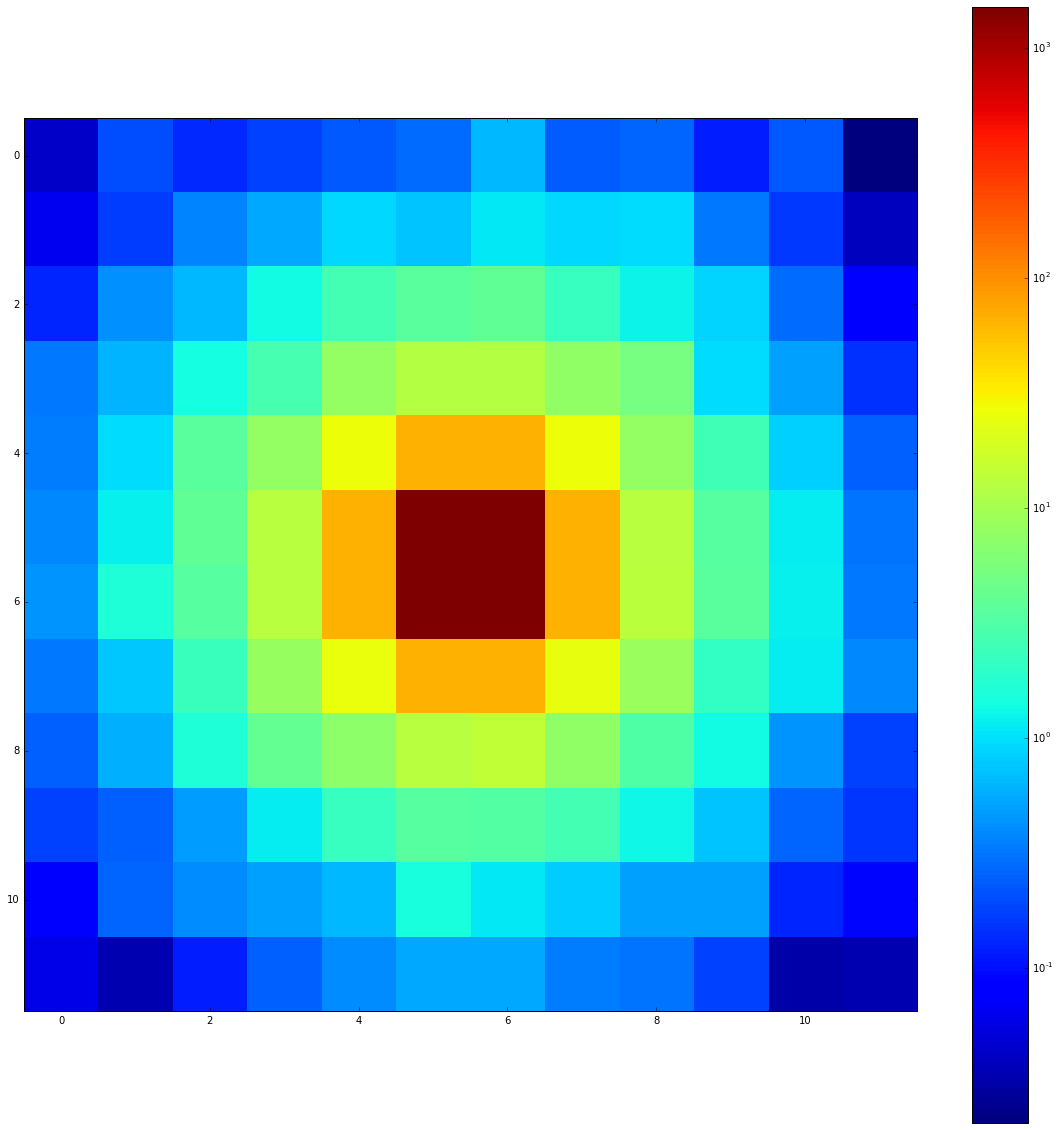

In [72]:
plt.figure(figsize=(20,20))
plt.imshow(second.mean(axis=0), interpolation='nearest', norm=LogNorm())
plt.colorbar()

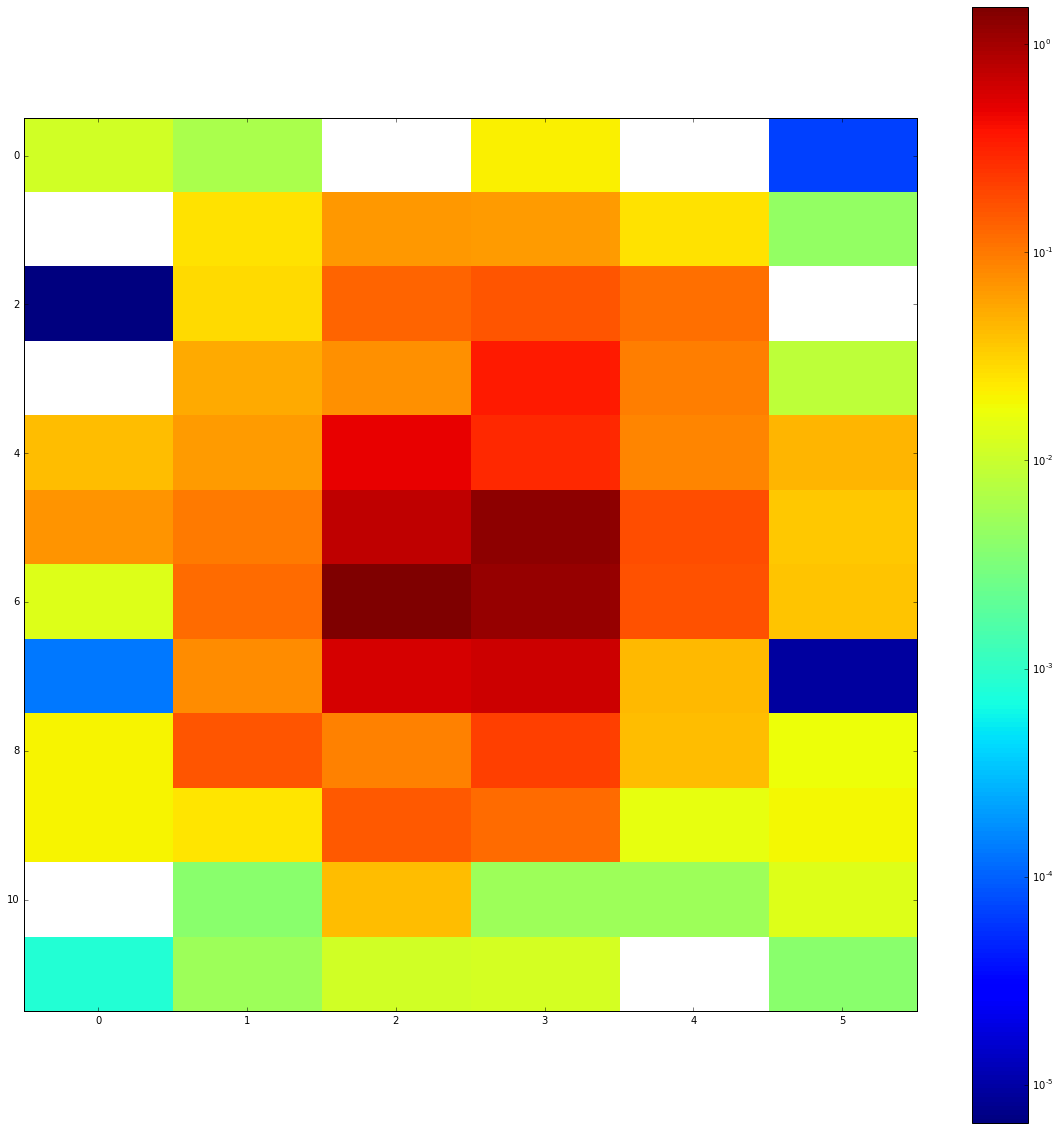

In [73]:
plt.figure(figsize=(20,20))
plt.imshow(third.mean(axis=0), interpolation='nearest', norm=LogNorm(), aspect=1/2.)
plt.colorbar()

pyplot imshow shows equal size pixels. This won't be a problem in the future once we homogenize the pixel sizes across etas, but right now these images are not realistic.

Metrics:
    - depth (categorical? 1, 2, 3?)
    - r^2 (squared transverse distance from particle direction)

r^2 is going to be very easy to calculate once we have a uniform binning scheme across all three calorimeter layers

How should we take into account the depth of each layer? As a separation distance among images?

# Sample info

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


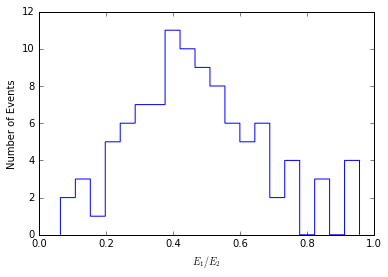

In [74]:
# -- ratio of energy deposited in the first layer to energy deposited in the second layer
fs_ratio = [f.sum()/float(s.sum()) for f,s in zip(first, second)]
_ = plt.hist(np.array(fs_ratio)[np.isfinite(fs_ratio)], bins=20, histtype='step')
plt.ylabel('Number of Events')
plt.xlabel(r'$E_1 / E_2$')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


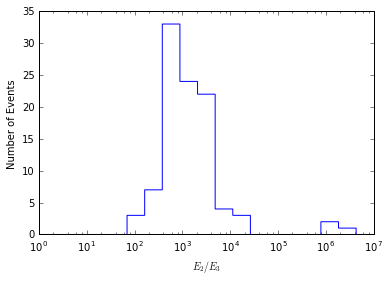

In [75]:
# -- ratio of energy deposited in the second layer to energy deposited in the third layer
st_ratio = [s.sum()/float(t.sum()) for s,t in zip(second, third)]
_ = plt.hist(np.array(st_ratio)[np.isfinite(st_ratio)], bins=np.logspace(0, 7, 20), histtype='step')
plt.xscale('log')
plt.ylabel('Number of Events')
plt.xlabel(r'$E_2 / E_3$')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


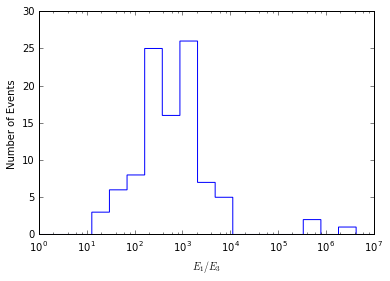

In [76]:
# -- ratio of energy deposited in the first layer to energy deposited in the third layer
ft_ratio = [f.sum()/float(t.sum()) for f,t in zip(first, third)]
_ = plt.hist(np.array(ft_ratio)[np.isfinite(ft_ratio)], bins=np.logspace(0, 7, 20), histtype='step')
plt.xscale('log')
plt.ylabel('Number of Events')
plt.xlabel(r'$E_1 / E_3$')

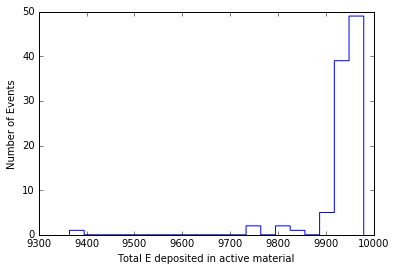

In [77]:
# -- total energy deposited in active material
E = [f.sum() + s.sum() + t.sum() for f, s, t in zip(first, second, third)]
_ = plt.hist(E[1:], bins=20, histtype='step') # the first event is empty
plt.ylabel('Number of Events')
plt.xlabel('Total E deposited in active material')

# Finer Sample

In [78]:
d = pd.read_csv("data/Geant4_10GeVeminus_LaROnly_10k_cells_finer_mod.txt", delimiter=",", header=None, skiprows=1, 
                nrows=10).values

Number of cells per layer: 30,960|120,120|120,60

I'm assuming they are all of uneven sizes, just finer than before.

In [79]:
print 30*960 + 120*120 + 120*60
print d.shape 

50400
(10, 50400)


Why are we missing 2 pixels?

In [80]:
first, second, third = np.split(d, indices_or_sections=[30*960, 30*960 + 120*120], axis=1)

In [81]:
# -- reshape to put them into unravelled, 2D image format
first = first.reshape(-1, 30, 960)
second = second.reshape(-1, 120, 120)
third = third.reshape(-1, 120, 60)

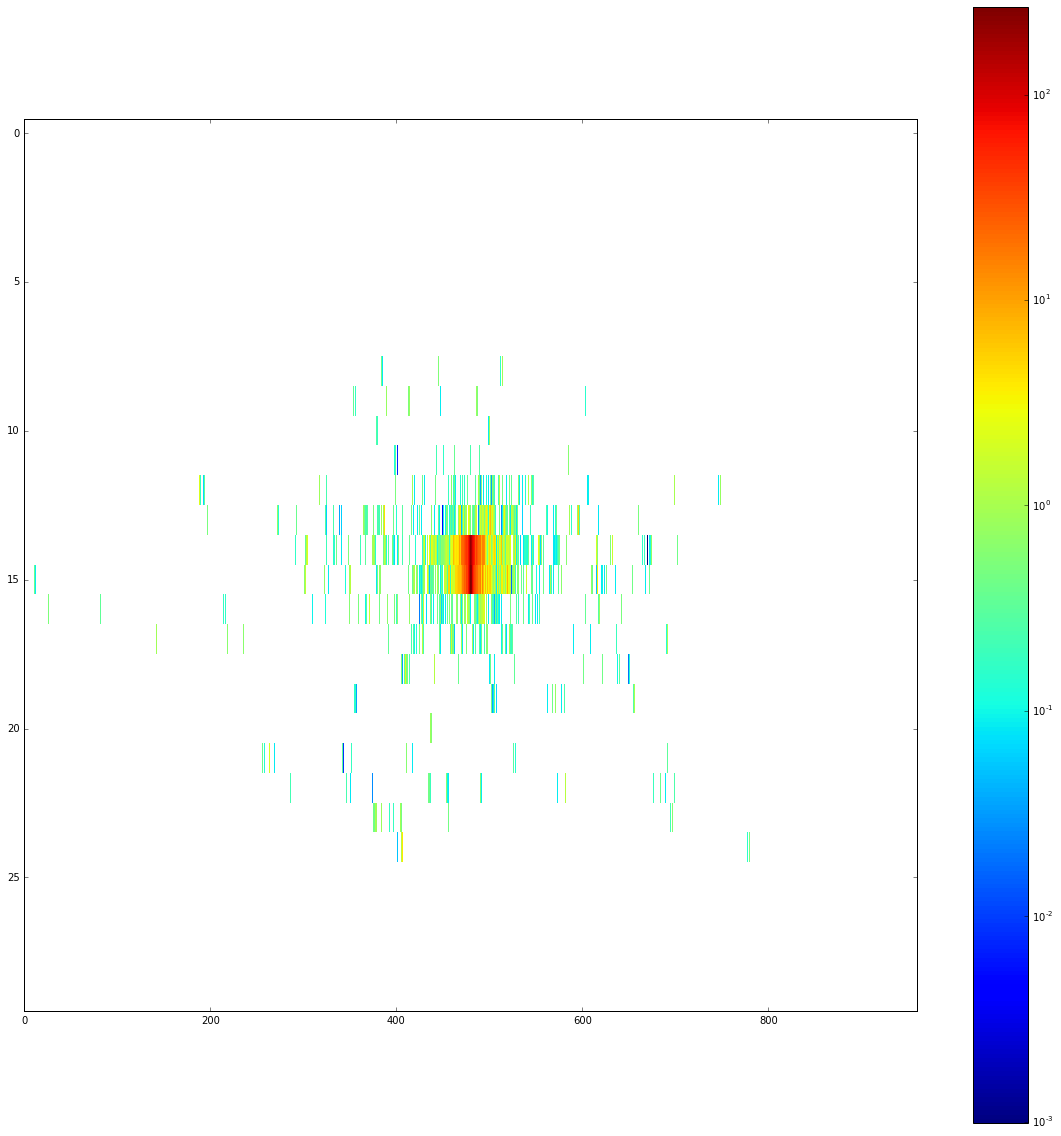

In [82]:
imageix = 1 # first event is still empty
plt.figure(figsize=(20,20))
plt.imshow(first[imageix], aspect=960/30, interpolation='nearest', norm=LogNorm())
plt.colorbar()

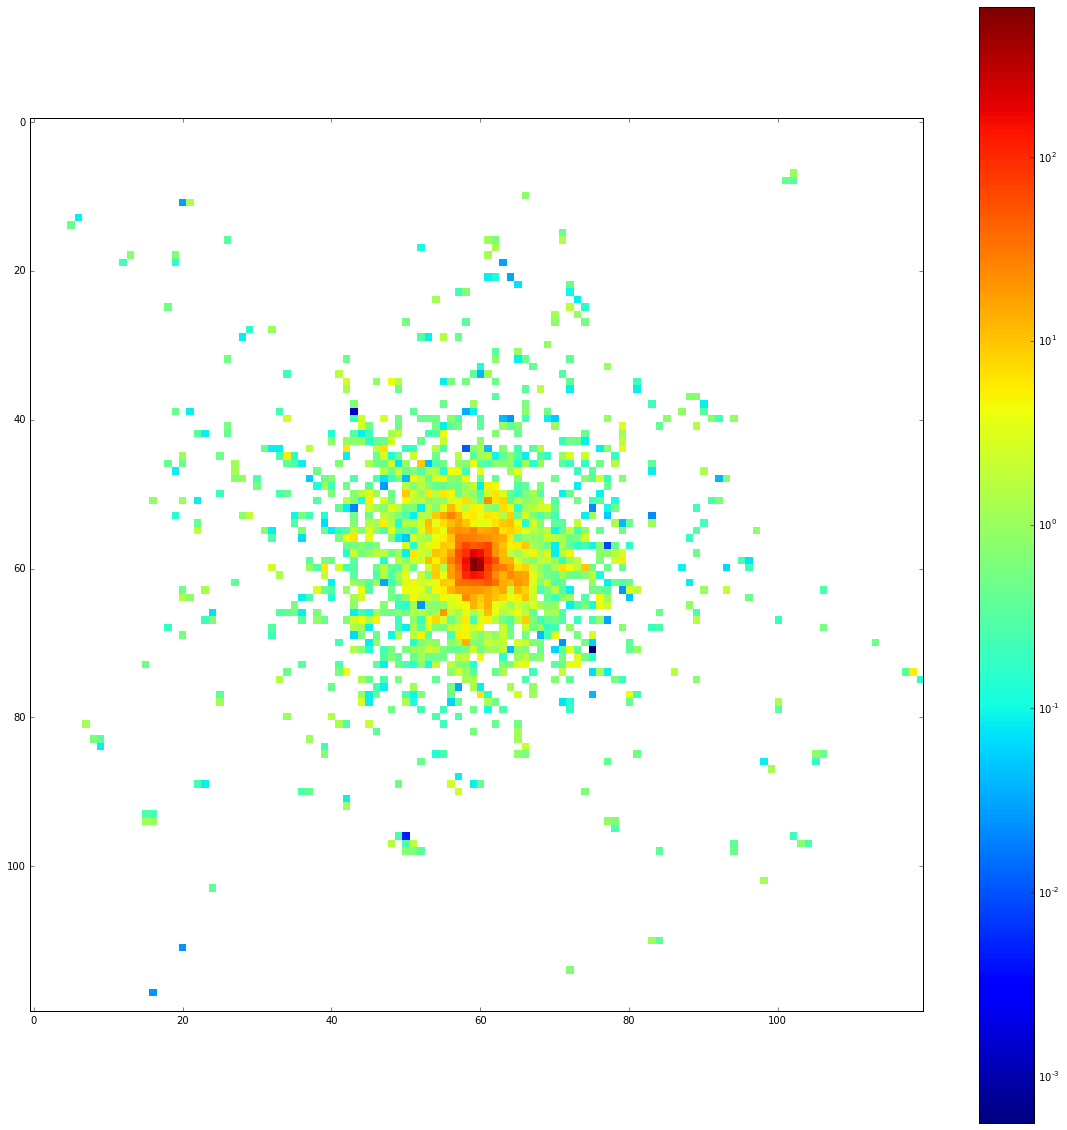

In [83]:
plt.figure(figsize=(20,20))
plt.imshow(second[imageix], interpolation='nearest', norm=LogNorm())
plt.colorbar()

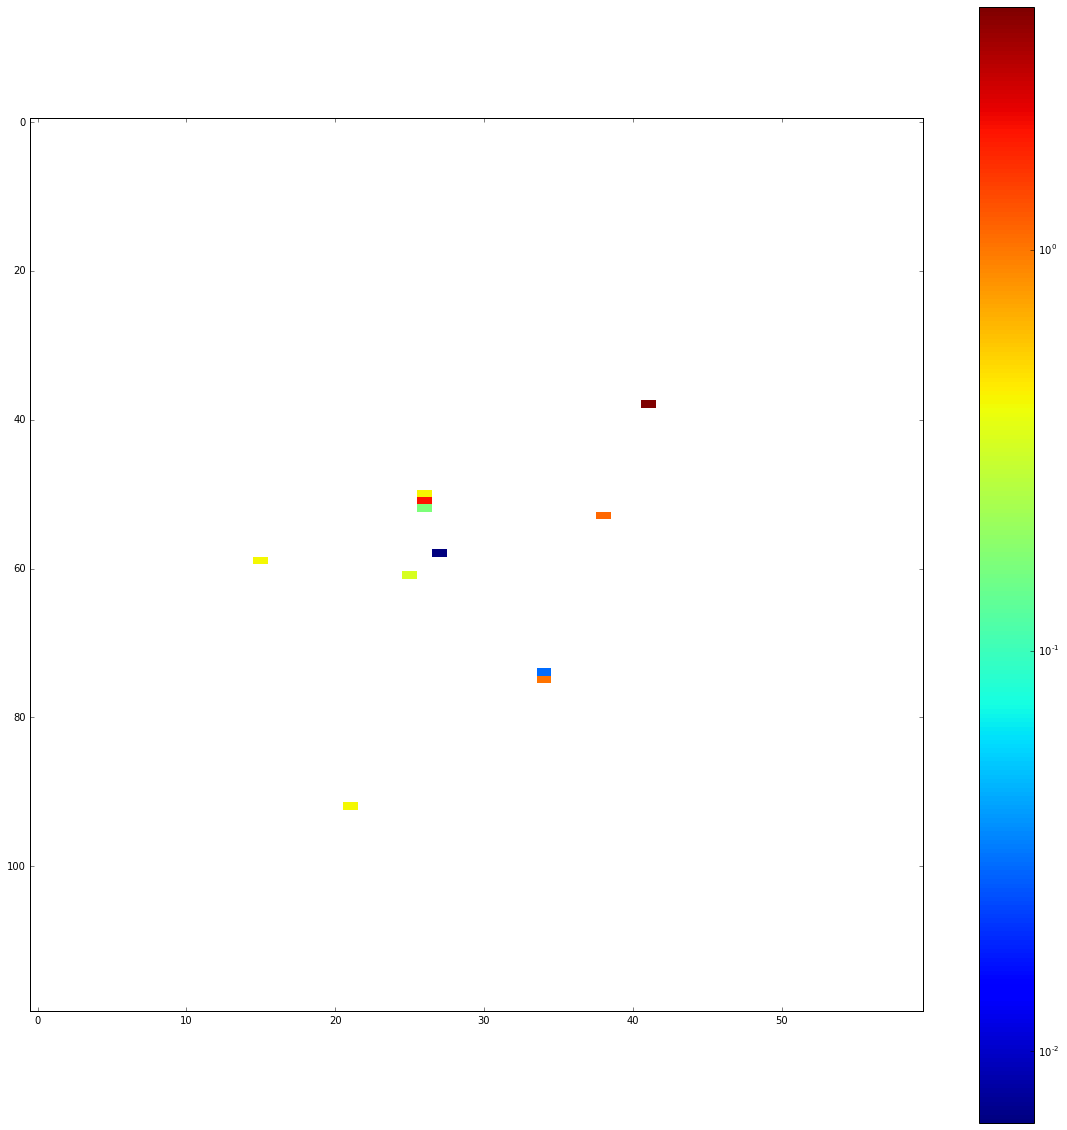

In [84]:
plt.figure(figsize=(20,20))
plt.imshow(third[imageix], aspect=60/120.0, interpolation='nearest', norm=LogNorm())
plt.colorbar()